In [ ]:
########################################################################
# Author    : A. Alsema
# Date      : Augustus 2021
# Dataset   : Visium Spatial Transcriptomics for MS lesions
# Purpose   : Visualize cluster marker genes as heatmap

# Note: this is an example run for 1 clustering result (A4, active lesion) 

# Inputs: 
# - indir : contains the "XXX_sce_qX.rds" with final clustering results.
# - degpath: contains csv file with significantly enriched cluster markers
# - sampleID: a vector of samples to be processed
# - q: optimized q-value per sample

# Output    : heatmap corresponding to figure 2c.
#########################################################################

[1] "reordering cluster levels for:"
[1] "ST79"
[1] "from"
[1] 1 4 5 2 3
[1] "to"
[1] 1 2 3 4 5


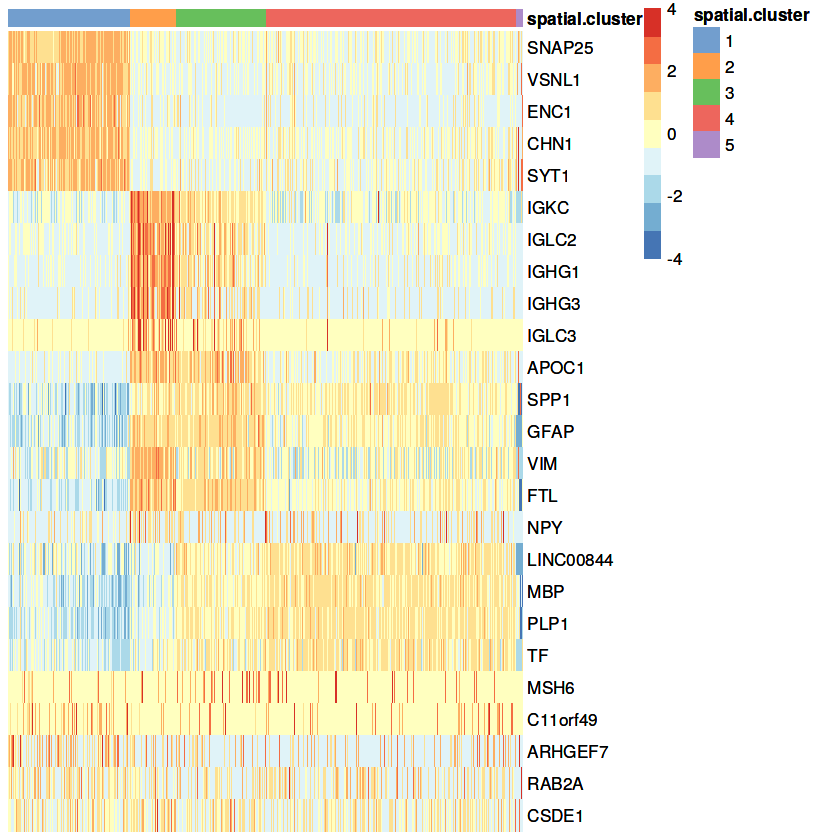

In [37]:
# Load required libraries
require(RColorBrewer)
require(scater)
require(ggplot2)
require(dplyr)
require(patchwork)


# Define input directory and DEG path
indir <- "RData/BS/2.peregrine/"
degpath <- "Routput/BS/upmarkers/"

# Define sample IDs and corresponding cluster numbers
sampleID <- c("ST79")
q <- c(5)

# Read in the SingleCellExperiment object
sce <- readRDS(file = paste0(indir, sampleID, "_sce_q", q, ".rds"))

# Read in the marker genes data
markers <- read.csv(file = paste0(degpath, sampleID, "_q", q, "_sign_up_markers.csv"),
                    row.names = 1, header = TRUE, stringsAsFactors = FALSE)

# Print reordering information for debugging
print("reordering cluster levels for:")
print(sampleID)
print("from")
print(unique(markers$cluster))
print("to")
cluster_order <- seq(1, length(unique(markers$cluster)))
print(cluster_order)

# Select top 5 marker genes per cluster based on average log2 fold change
markers <- markers %>% 
    arrange(cluster) %>% 
    group_by(cluster) %>% 
    slice_max(n = 5, order_by = avg_log2FC) %>%
    distinct(gene) -> top5

# Extract the genes to be plotted
features.to.plot <- top5$gene

# Reorder spatial cluster levels in the SingleCellExperiment object
sce$spatial.cluster <- factor(sce$spatial.cluster, levels = cluster_order)

# Plot heatmap of the selected features
p <- plotHeatmap(sce, features = as.character(features.to.plot), 
                          color_columns_by  = "spatial.cluster",
                          order_columns_by = "spatial.cluster",
                          exprs_values = "logcounts",
                          cluster_rows = FALSE, 
                          cluster_cols = FALSE, 
                          center = TRUE,
                          scale = TRUE,
                          zlim = c(-4, 4)
                          )
print(p)

In [1]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS/LAPACK: /data/bcn/p283607/anaconda3/envs/R4.2/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_1.0.3     crayon_1.5.2    digest_0.6.30   utf8_1.2.2     
 [5] IRdisplay_1.1   repr_1.1.4      lifecycle_1.0.3 jsonlite_1.8.4 
 [9] evaluate_0.18   pillar_1.8.1    rlang_1.0.6     cli_3.4.1      
[13] uuid_1.1-0      vctrs_0.5.1     IRkernel_1.3.1  tools_4.2.0    
[17] glu